In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np


In [4]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [19]:
train_dataset = train.flow_from_directory('basedata/train/',
                                         target_size = (480,720),
                                         batch_size = 3,
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory('basedata/validation/',
                                         target_size = (480,720),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 791 images belonging to 2 classes.
Found 154 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu',input_shape=(480,720,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])


In [22]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 10,
                     epochs = 50,
                     validation_data = validation_dataset)

model.save('data.h5')

Epoch 1/50
10/10 [==============================] - 13s 1s/step - loss: 4.1724 - accuracy: 0.7333 - val_loss: 0.4675 - val_accuracy: 0.9351
Epoch 2/50
10/10 [==============================] - 12s 1s/step - loss: 0.4463 - accuracy: 0.8000 - val_loss: 0.1946 - val_accuracy: 0.9610
Epoch 3/50
10/10 [==============================] - 11s 1s/step - loss: 0.1607 - accuracy: 0.9667 - val_loss: 0.7628 - val_accuracy: 0.5844
Epoch 4/50
10/10 [==============================] - 12s 1s/step - loss: 0.2987 - accuracy: 0.9000 - val_loss: 0.0428 - val_accuracy: 0.9935
Epoch 5/50
10/10 [==============================] - 11s 1s/step - loss: 0.0299 - accuracy: 1.0000 - val_loss: 0.2328 - val_accuracy: 0.9156
Epoch 6/50
10/10 [==============================] - 11s 1s/step - loss: 1.5107 - accuracy: 0.8000 - val_loss: 0.5610 - val_accuracy: 0.5260
Epoch 7/50
10/10 [==============================] - 11s 1s/step - loss: 0.2839 - accuracy: 0.8667 - val_loss: 0.1673 - val_accuracy: 1.0000
Epoch 8/50
10/10 [==

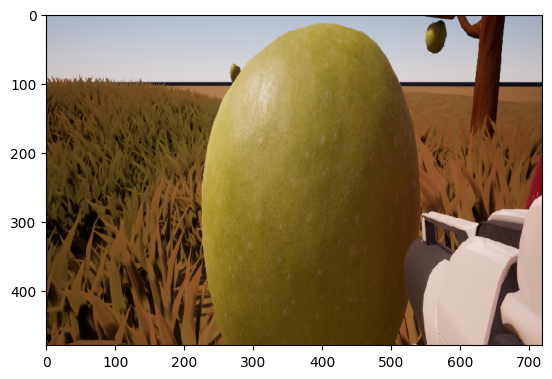

1/1 [==============================] - 0s 117ms/step
Green apple


In [23]:
model = tf.keras.models.load_model('data.h5')
dir_path = 'basedata/testing'
X = []
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size = (480,720))
    plt.imshow(img)
    plt.show()
    
    y = image.img_to_array(img)
    y = np.expand_dims(y,axis = 0)
    X.append(y)
images = np.vstack(X)
val = model.predict(images)
if val == 0:
    print("Green apple")
else:
    print("Red apple") 